Question 1 Of Assignment 2

In [1]:
#imports
import cv2
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
# Load the metadata file
def readMetaData():
    metadata = pd.read_csv("D:/FAST_NUCES/7thSemester/DLP/Assignment/Assignment1/Dataset/SkinCancer/archive/ham10000_metadata.csv")
    return metadata
metadata = readMetaData()

metadata 

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
# Load the images folder + Preprocess
imageslocation = 'D:/FAST_NUCES/7thSemester/DLP/Assignment/Assignment1/Dataset/SkinCancer/archive/HAM10000_images_part_1'

# Define the new image size
new_size = (224, 224)

# Load the images from the folder and resize them
images = []
labels = []
for filename in os.listdir(imageslocation):
    if filename.endswith(".jpg"):
        image = cv2.imread(os.path.join(imageslocation, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, new_size)
        images.append(image)
        label = metadata[metadata["image_id"] == filename.split(".")[0]]["dx"].values[0]
        labels.append(label)

# Convert the images to NumPy arrays
images = np.array(images)

# Preprocess the images
images = images.astype("float32") / 255

In [4]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)



In [5]:
def Display_N_Training_Images(train_images, train_labels, test_images, test_labels, N):
    # Display the first N images from the training set and their labels
    print("Display the first", N, "images from the training set and their labels:")
    for i in range(N):
        plt.figure()
        plt.imshow(train_images[i])
        plt.title(train_labels[i])
        plt.show()
    
    # Display the first N images from the testing set and their labels
    print("Display the first", N, "images from the testing set and their labels:")
    for i in range(N):
        plt.figure()
        plt.imshow(test_images[i])
        plt.title(test_labels[i])
        plt.show()

Display the first 4 images from the training set and their labels:


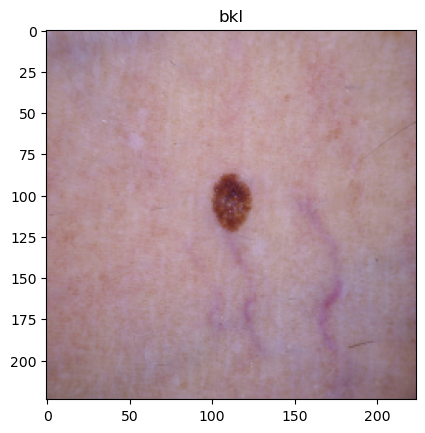

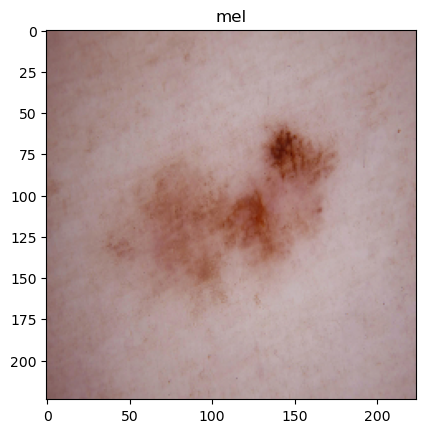

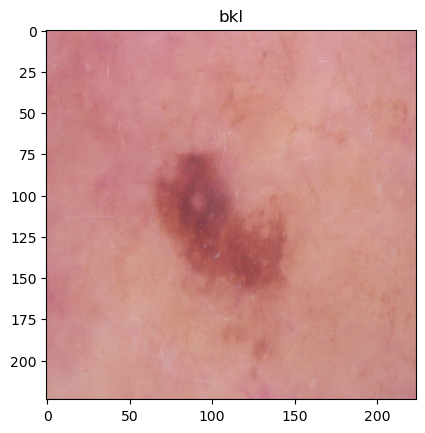

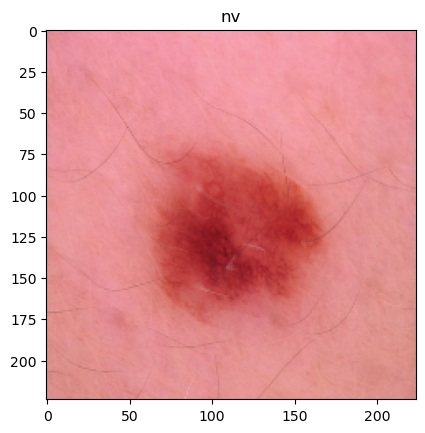

Display the first 4 images from the testing set and their labels:


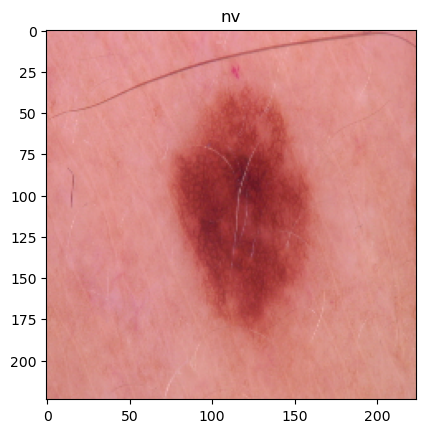

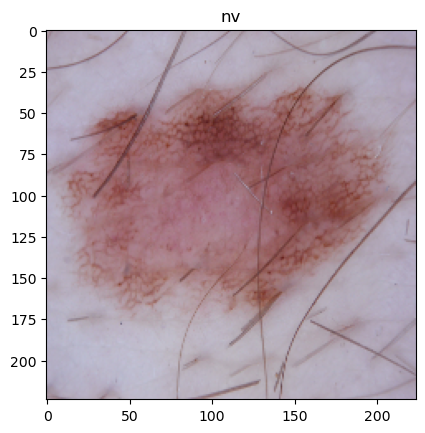

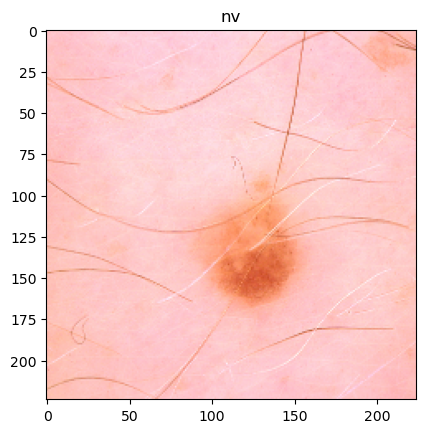

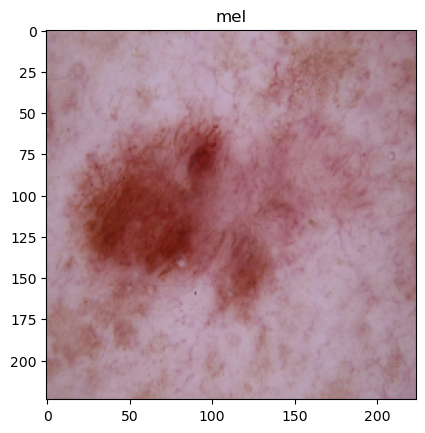

In [6]:
#Displaying the first 4 images
Display_N_Training_Images(train_images, train_labels, test_images, test_labels, 4)

In [7]:
# Encode the labels (to be numeric values instead of strings)
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.transform(test_labels)


In [11]:
#Defined a call back function to stop training when accuracy reaches 98%
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.98:                 
                print("\nReached 98% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
                self.model.stop_training = True
# Instantiate class
callback = myCallback()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Train the model with the callback
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/100
251/251 [==============================] - 187s 745ms/step - loss: 1.0318 - accuracy: 0.6682 - val_loss: 0.9804 - val_accuracy: 0.6590
Epoch 2/100
251/251 [==============================] - 185s 739ms/step - loss: 0.9320 - accuracy: 0.6752 - val_loss: 0.8820 - val_accuracy: 0.6830
Epoch 3/100
251/251 [==============================] - 191s 759ms/step - loss: 0.8773 - accuracy: 0.6845 - val_loss: 0.8701 - val_accuracy: 0.6675
Epoch 4/100
251/251 [==============================] - 191s 761ms/step - loss: 0.8187 - accuracy: 0.6993 - val_loss: 0.8583 - val_accuracy: 0.6945
Epoch 5/100
251/251 [==============================] - 190s 759ms/step - loss: 0.7757 - accuracy: 0.7106 - val_loss: 0.7783 - val_accuracy: 0.7094
Epoch 6/100
251/251 [==============================] - 190s 757ms/step - loss: 0.7356 - accuracy: 0.7230 - val_loss: 0.8968 - val_accuracy: 0.6830
Epoch 7/100
251/251 [==============================] - 191s 760ms/step - loss: 0.6903 - accuracy: 0.7433 - val_loss: 0

**EVALUATION METRICS**

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# Get the predicted labels for the test set
test_prob = model.predict(test_images)
# Get the predicted labels by taking the index of the class with the highest probability
test_pred = np.argmax(test_prob, axis=1)

63/63 [==============================] - 9s 142ms/step


In [15]:
#Find all the evaluation metrics for both models
accuracy_bm = accuracy_score(test_labels, test_pred)
precision_bm = precision_score(test_labels, test_pred, average='macro')
recall_bm = recall_score(test_labels, test_pred, average='macro')
f1_bm = f1_score(test_labels, test_pred, average='macro')

print("Accuracy: ", accuracy_bm)
print("Precision: ", precision_bm)
print("Recall: ", recall_bm)
print("F1: ", f1_bm)

Accuracy:  0.7114328507239142
Precision:  0.5622366636066338
Recall:  0.4623453261837514
F1:  0.48983512973137344


<AxesSubplot:title={'center':'Confusion Matrix for Question 1: CNN Model'}>

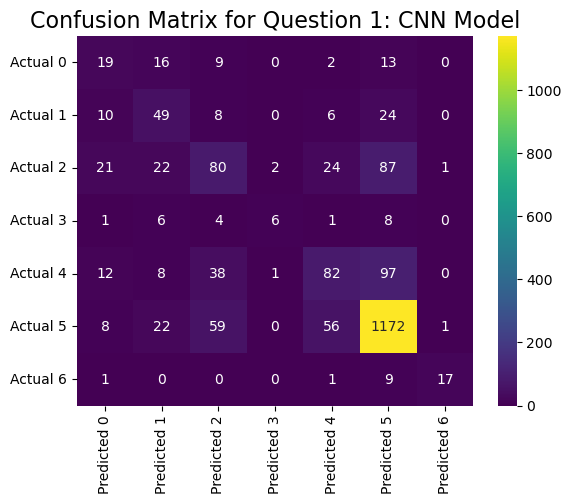

In [17]:
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
#Writing Function for Confusion Matrix
def plot_conf_mat(y_test,y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indexx = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=column, index=indexx)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

#plotting their confusion matrices
plt.title('Confusion Matrix for Question 1: CNN Model', fontsize=16, loc='center')
plot_conf_mat(test_labels,test_pred)


In [ ]:
#Saving the model
model.save('Q1.h5')

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the saved model
model = load_model('Q1.h5')

In [ ]:
# Define a function to preprocess the image
def preprocess_image(image):
    # Resize the image to the input shape of the model
    image = cv2.resize(image, (224, 224))
    # Convert the pixel values to the range [0, 1]
    image = image / 255.0
    # Add a batch dimension to the image
    image = np.expand_dims(image, axis=0)
    return image

# Define a function to predict the class label of an image
def predict_image(file_path):
    # Load the image file
    image = cv2.imread(file_path)
    # Preprocess the image
    image = preprocess_image(image)
    # Make a prediction using the model
    predictions = model.predict(image)
    # Get the predicted class label
    predicted_class = np.argmax(predictions[0])
    return predicted_class